In [173]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers , optimizers 
import numpy as np
import matplotlib.pyplot as plt



In [174]:
data = pd.read_csv('E:\\Kaggle datasets\\CAR Price Preditction\\CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [175]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [177]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['doornumber']=data['doornumber'].map({'two':2, 'four':4})
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel'] =labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])

In [178]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

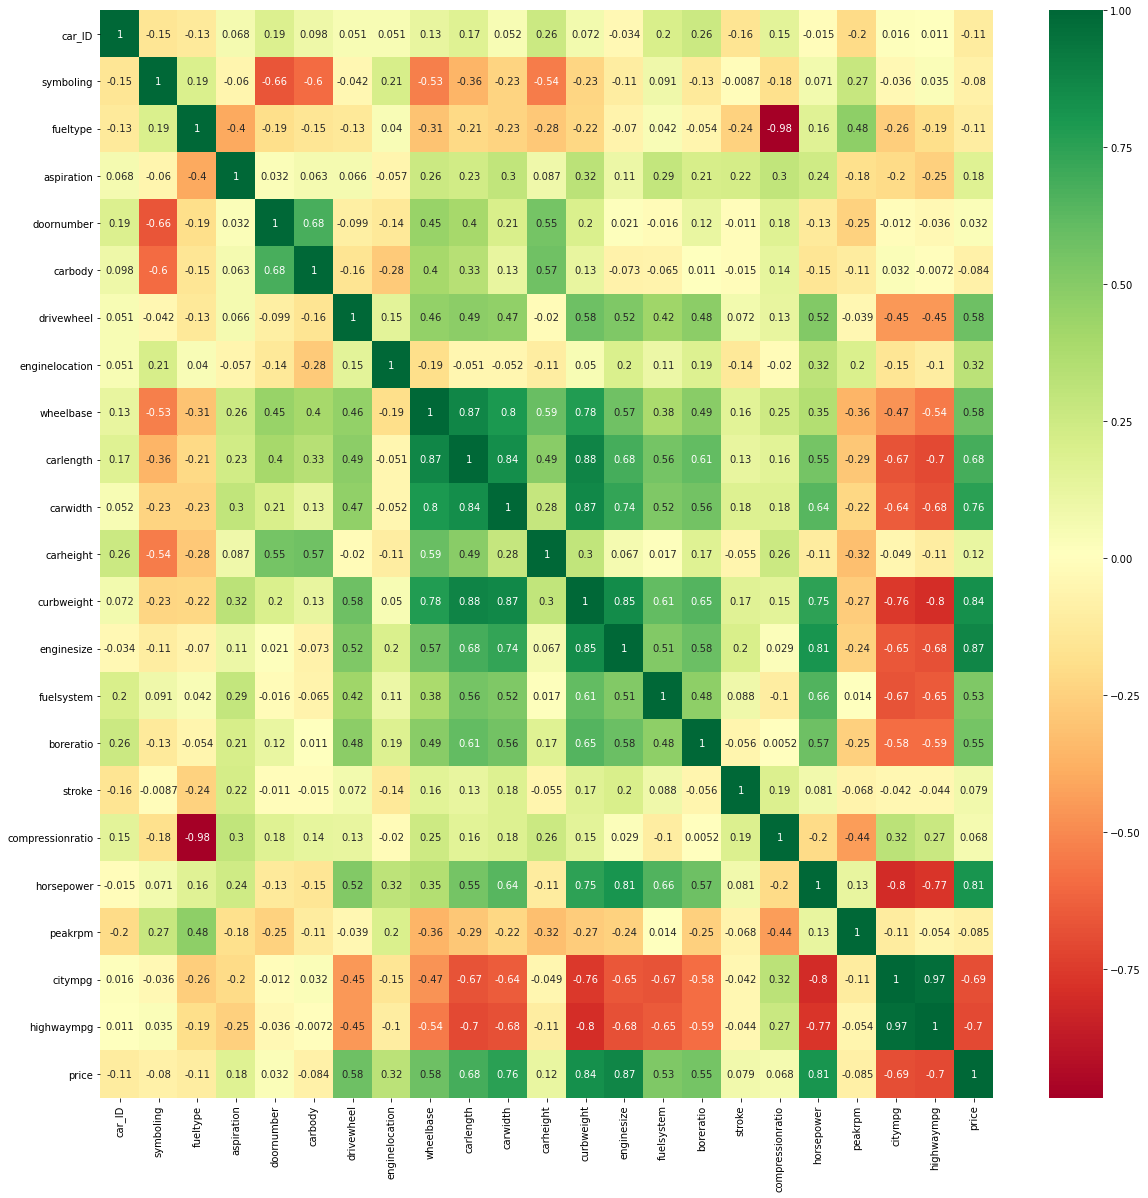

In [180]:
import seaborn
corelation = data.corr()
top_corelated_features = corelation.index
plt.figure(figsize=(20,20))
graph = seaborn.heatmap(data[top_corelated_features].corr(),annot=True, cmap="RdYlGn")

In [181]:
refined_cols = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel','price','enginelocation']]

In [182]:
print(refined_cols.shape)
refined_cols.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


In [183]:
x = (refined_cols.loc[:, refined_cols.columns!='price'])
y = (refined_cols.loc[:,refined_cols.columns=='price'])

In [184]:
x

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,0
...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,2,0
201,160,3.78,141,3049,68.8,188.8,109.1,2,0
202,134,3.58,173,3012,68.9,188.8,109.1,2,0
203,106,3.01,145,3217,68.9,188.8,109.1,2,0


In [185]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [187]:
x_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
66,72,3.43,134,2700,66.1,175.0,104.9,2,0
111,95,3.46,120,3075,68.4,186.7,107.9,2,0
153,62,3.05,92,2280,63.6,169.7,95.7,1,0
96,69,3.15,97,1971,63.8,165.3,94.5,1,0
38,86,3.15,110,2289,65.2,167.5,96.5,1,0
...,...,...,...,...,...,...,...,...,...
106,160,3.43,181,3139,67.9,178.5,99.2,2,0
14,121,3.31,164,3055,66.9,189.0,103.5,2,0
92,69,3.15,97,1938,63.8,165.3,94.5,1,0
179,161,3.27,171,3016,67.7,183.5,102.9,2,0


In [188]:
x_test

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
15,182,3.62,209,3230,66.9,189.0,103.5,2,0
9,160,3.13,131,3053,67.9,178.2,99.5,0,0
100,97,3.33,120,2302,65.2,173.4,97.2,1,0
132,110,3.54,121,2658,66.5,186.6,99.1,1,0
68,123,3.58,183,3750,70.3,190.9,110.0,2,0
95,69,3.15,97,2028,63.8,165.6,94.5,1,0
159,56,3.27,110,2275,64.4,166.3,95.7,1,0
162,70,3.19,98,2140,64.4,166.3,95.7,1,0
147,94,3.62,108,2455,65.4,173.5,97.0,1,0
182,52,3.01,97,2261,65.5,171.7,97.3,1,0


In [189]:
y_train

,price
66,18344.0
111,15580.0
153,6918.0
96,7499.0
38,9095.0
...,...
106,18399.0
14,24565.0
92,6849.0
179,15998.0


In [190]:
y_test

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
95,7799.000
159,7788.000
162,9258.000
147,10198.000
182,7775.000


In [191]:
mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std

In [192]:

from tensorflow.keras import models, layers, optimizers
def building_model():
    model = models.Sequential()
    model.add(tf.keras.layers.Dense(10 , activation='relu' , input_shape=(9,)))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(6,activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
    return model

In [193]:

import numpy as np
k = 4
number_of_validation_smples = len(x_train)//k # 164//4=41
number_of_epochs=100
all_score=[] 

In [194]:
for i in range(k):
    print('Processing fold =' ,i)
    val_x_train = x_train[i * number_of_validation_smples:(i+1)*number_of_validation_smples ]
    val_y_train = y_train[i * number_of_validation_smples:(i+1)*number_of_validation_smples]
    partial_x_train = np.concatenate([x_train[:i * number_of_validation_smples],x_train[i * number_of_validation_smples:]], axis=0)
    partial_y_train  = np.concatenate([y_train[:i * number_of_validation_smples],y_train[i * number_of_validation_smples:]], axis=0)
    model=building_model()
    history = model.fit(partial_x_train, partial_y_train,  validation_data=(val_x_train, val_y_train) , epochs=number_of_epochs , batch_size=20 , verbose=0)
    mae_history = history.history['val_mae']
    #val_mse, val_mae = model.evaluate(val_x_train, val_y_train , verbose=0)
    all_score.append(mae_history)
    #all_score


Processing fold = 0
Processing fold = 1
Processing fold = 2
Processing fold = 3


In [195]:
num_epochs = 100
average_mae_history = [
np.mean([x[i] for x in all_score]) for i in range(num_epochs)]

In [196]:
average_mae_history

[13223.19091796875,
 13223.09033203125,
 13222.97509765625,
 13222.83642578125,
 13222.684326171875,
 13222.52392578125,
 13222.347900390625,
 13222.14892578125,
 13221.93701171875,
 13221.7138671875,
 13221.4814453125,
 13221.220703125,
 13220.955810546875,
 13220.688232421875,
 13220.385498046875,
 13220.0673828125,
 13219.73388671875,
 13219.359130859375,
 13218.953369140625,
 13218.515380859375,
 13218.04345703125,
 13217.542236328125,
 13217.02294921875,
 13216.442138671875,
 13215.81640625,
 13215.14990234375,
 13214.4404296875,
 13213.69189453125,
 13212.864990234375,
 13211.957763671875,
 13211.01123046875,
 13209.9873046875,
 13208.8994140625,
 13207.7138671875,
 13206.496826171875,
 13205.1884765625,
 13203.7744140625,
 13202.31591796875,
 13200.78173828125,
 13199.14111328125,
 13197.434814453125,
 13195.576171875,
 13193.646728515625,
 13191.655517578125,
 13189.51025390625,
 13187.272216796875,
 13184.895751953125,
 13182.389404296875,
 13179.805908203125,
 13177.104736328

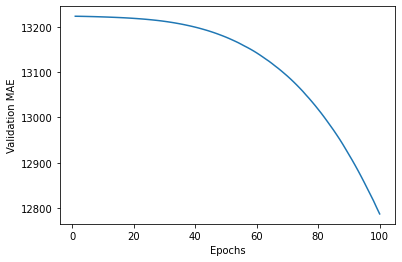

In [197]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

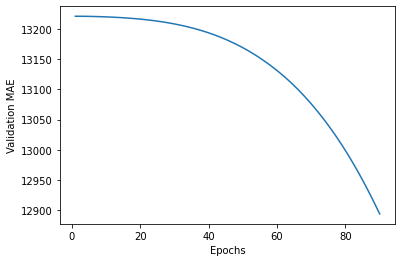

In [198]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
                smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
    


In [199]:
model = building_model()
model.fit(x_train, y_train,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 236770784.0000 - mae: 12718.9775


In [200]:
test_mse_score

236770784.0

In [201]:
test_mae_score

12718.9775390625

In [202]:
model.predict(x_test)

array([[1171.4012 ],
       [ 326.9439 ],
       [ 367.0344 ],
       [ 329.4693 ],
       [1336.8888 ],
       [ 821.4606 ],
       [ 650.5563 ],
       [ 717.4855 ],
       [ 279.84335],
       [ 717.9435 ],
       [ 289.47617],
       [ 547.96313],
       [ 627.4645 ],
       [ 245.49712],
       [2304.576  ],
       [ 933.8217 ],
       [1653.0367 ],
       [ 364.75928],
       [ 373.39014],
       [ 289.95926],
       [ 268.66348],
       [ 610.2925 ],
       [ 831.5125 ],
       [1352.5385 ],
       [1016.9242 ],
       [1294.4811 ],
       [ 446.59595],
       [ 876.78564],
       [ 790.5919 ],
       [ 849.56195],
       [1284.4497 ],
       [1020.6469 ],
       [1005.81116],
       [1076.0085 ],
       [ 866.45   ],
       [1197.2714 ],
       [ 386.8039 ],
       [ 388.35495],
       [ 993.8936 ],
       [ 389.05002],
       [ 311.93918]], dtype=float32)